In [1]:
import numpy as np
import pandas as pd
pd.set_option("display.max_columns", 300)
pd.set_option("display.max_rows", 100)
pd.set_option("max_colwidth", 200)

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import HuberRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV
from sklearn.linear_model import ElasticNet
from numpy import arange
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor

from sklearn import preprocessing

from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.feature_selection import SequentialFeatureSelector

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold

import matplotlib.pyplot as plt
import statistics

import seaborn as sns

In [2]:
base = pd.read_csv('../../Data/BaseData.csv')

In [3]:
base.shape

(2580, 299)

In [4]:
MLR = LinearRegression()

In [5]:
X = base.drop(['SalePrice'], axis=1).values
y = base.SalePrice.values

In [6]:
len(y)

2580

In [7]:
X.shape

(2580, 298)

In [8]:
X.shape[1]

298

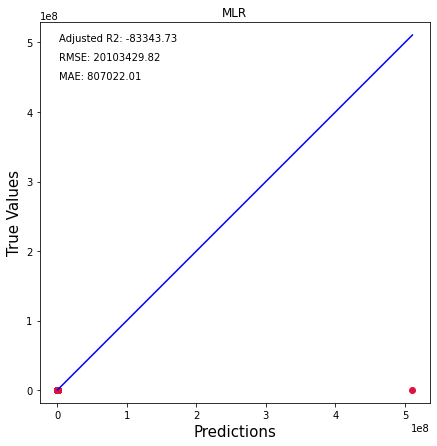

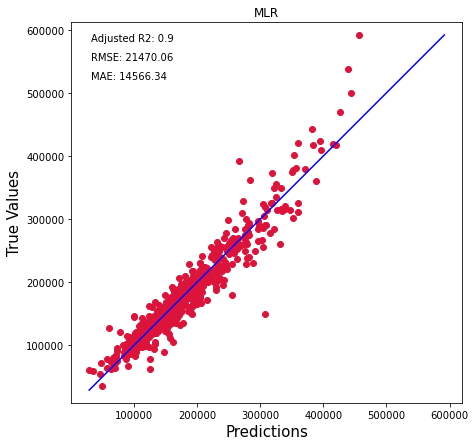

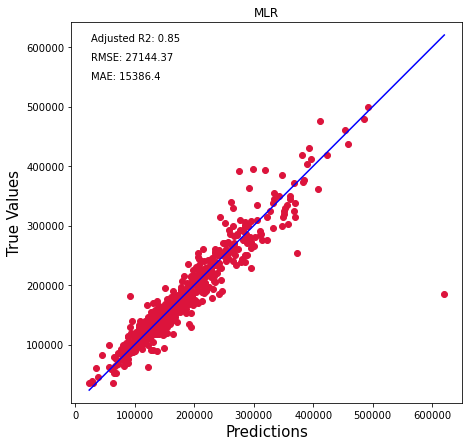

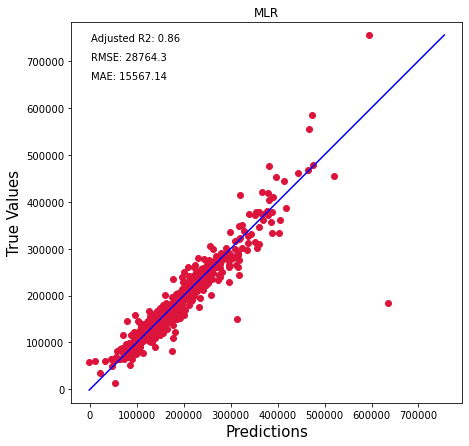

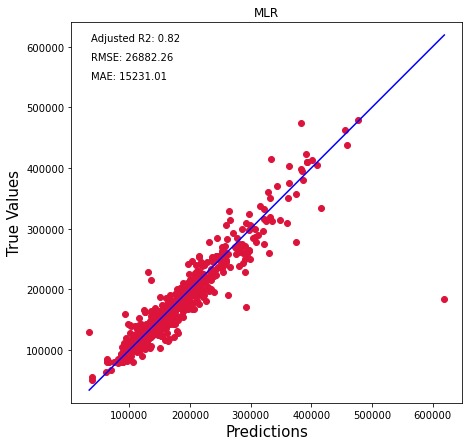

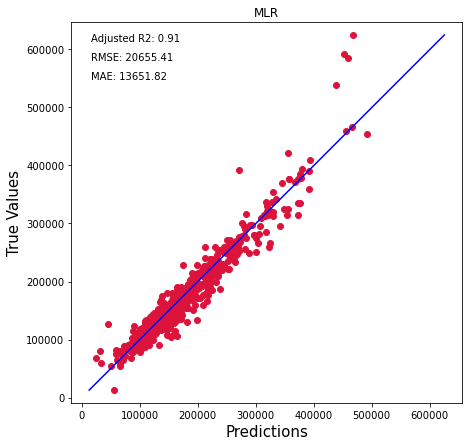

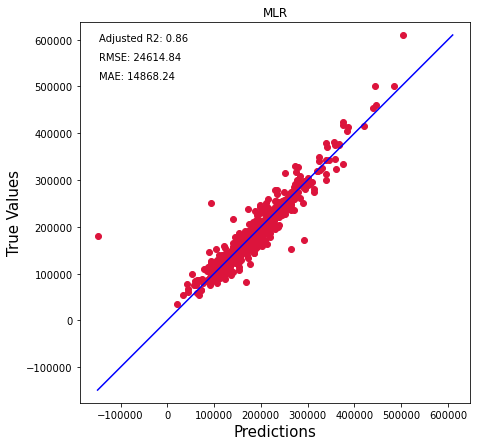

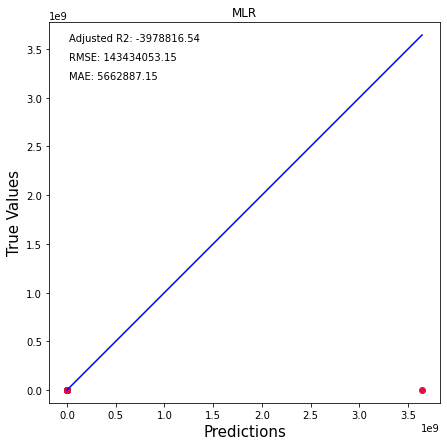

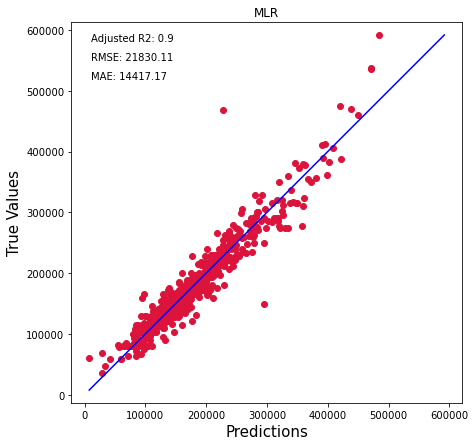

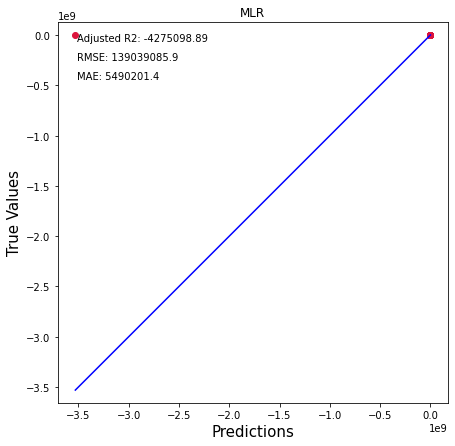

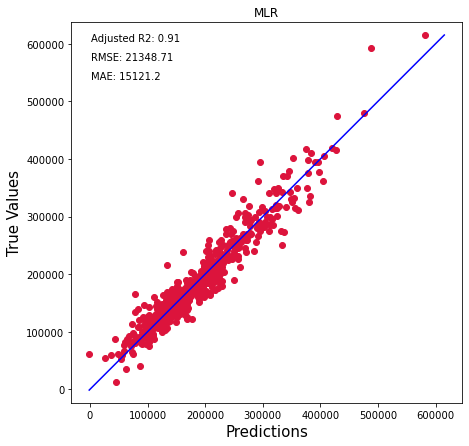

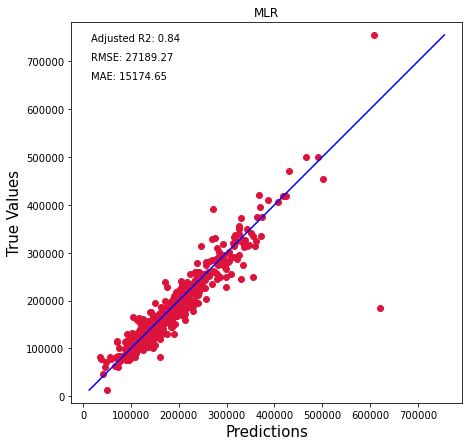

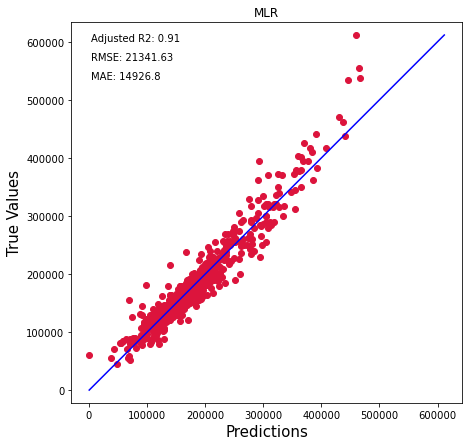

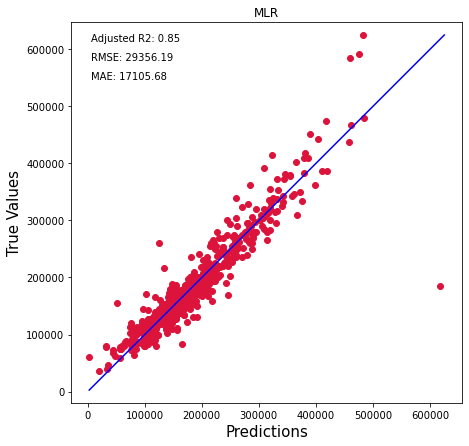

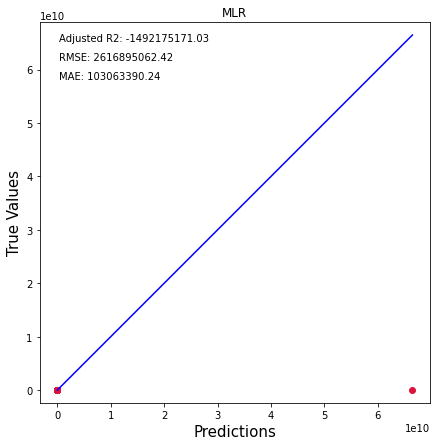

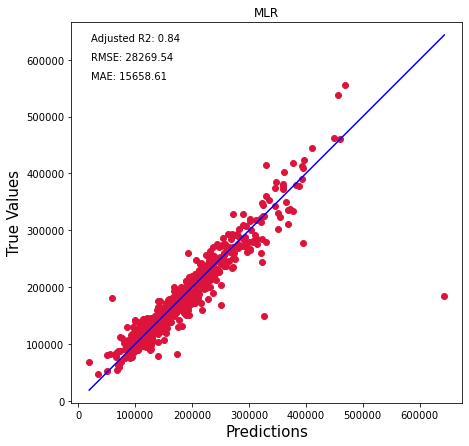

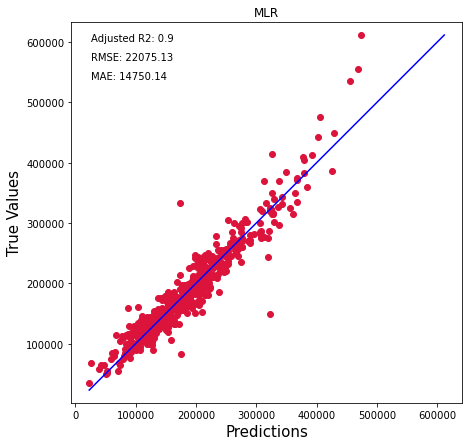

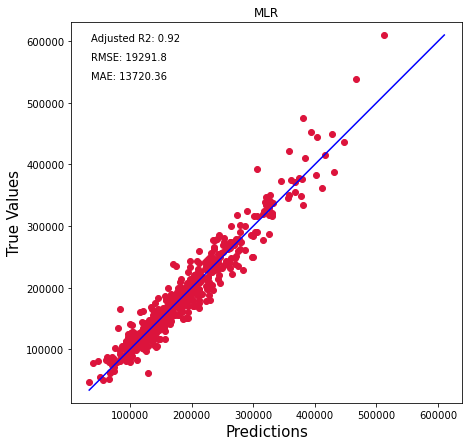

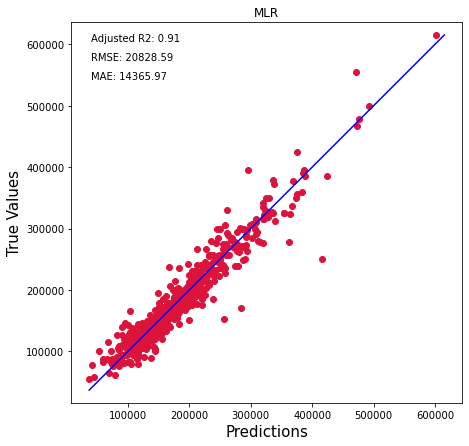

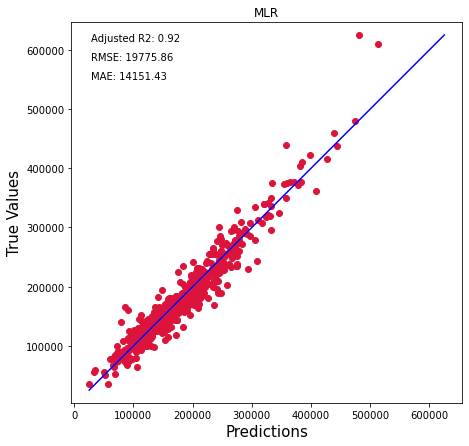

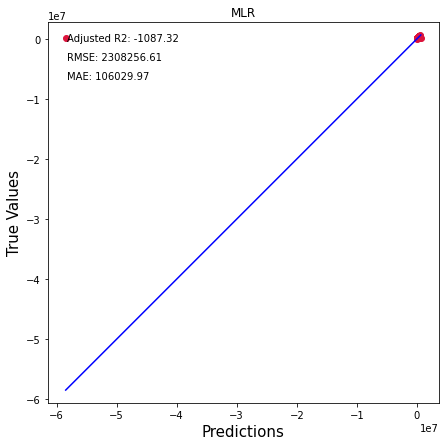

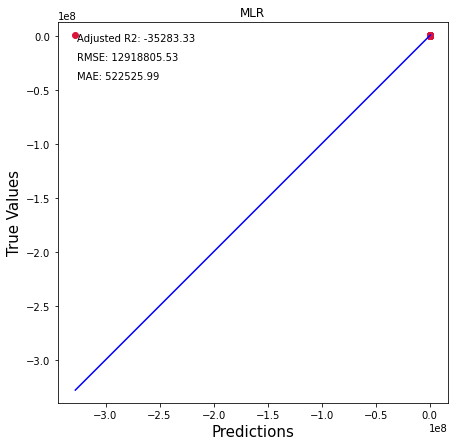

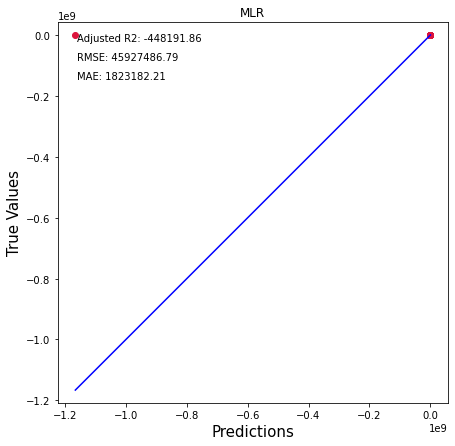

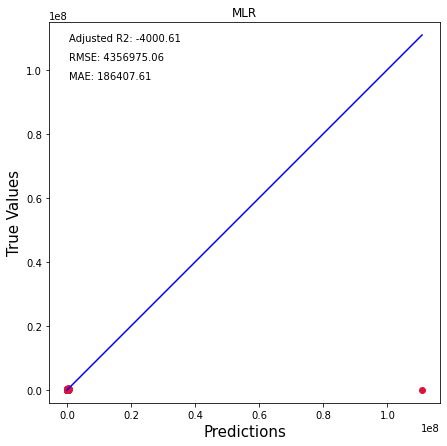

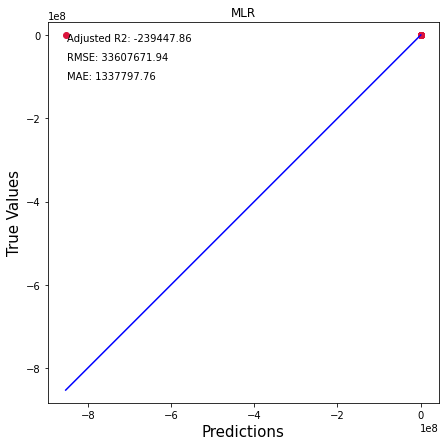

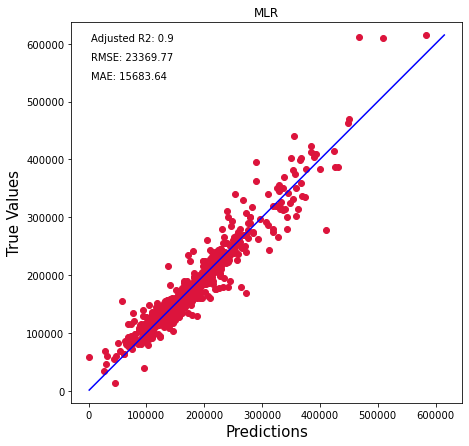

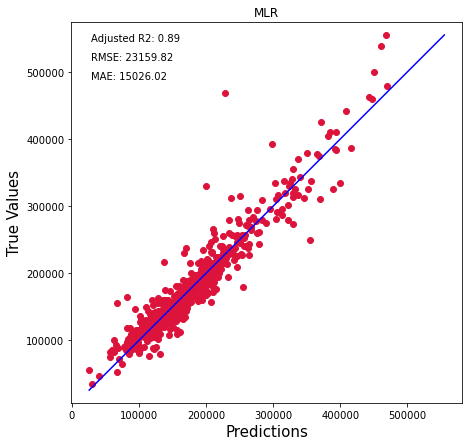

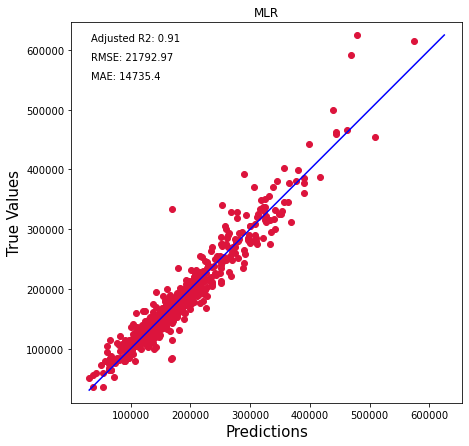

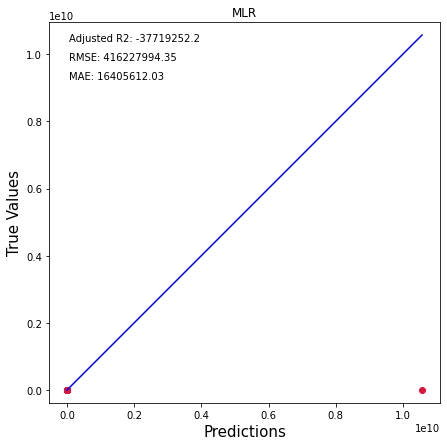

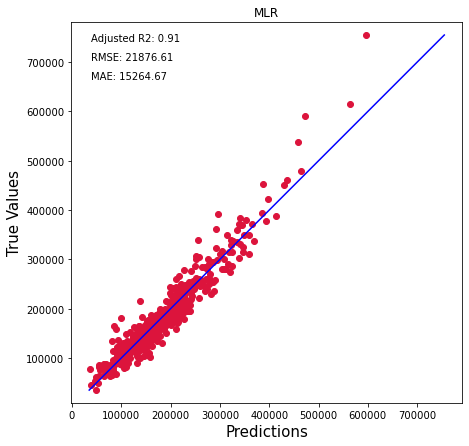

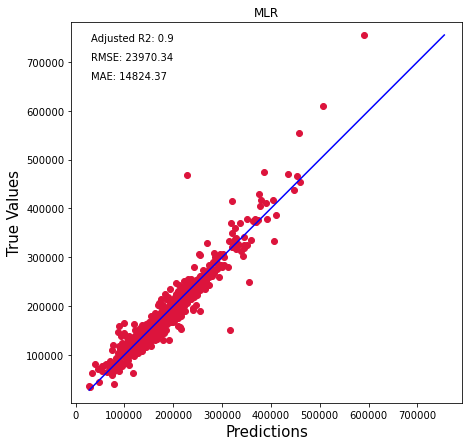

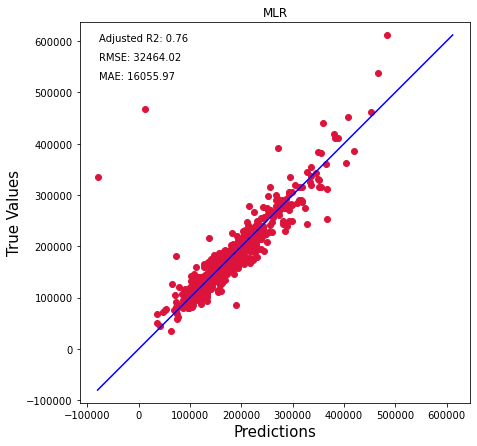

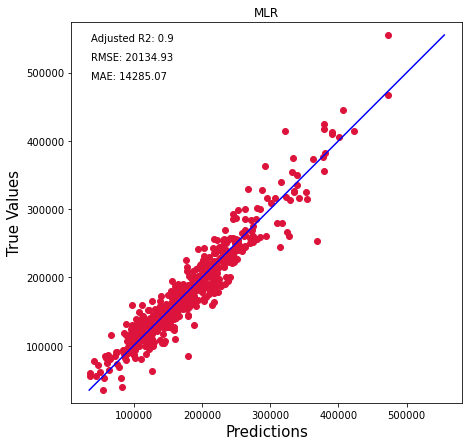

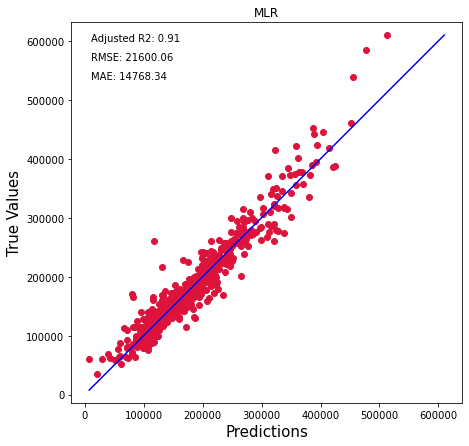

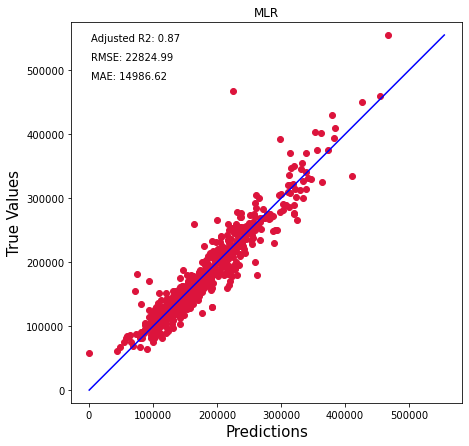

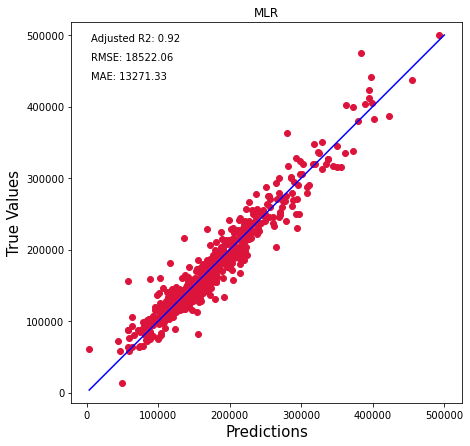

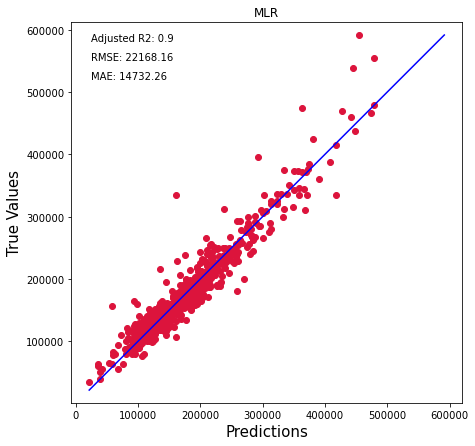

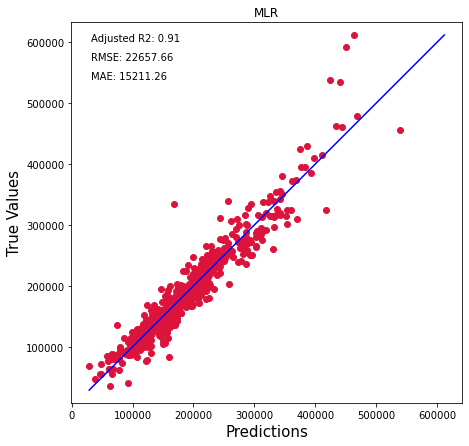

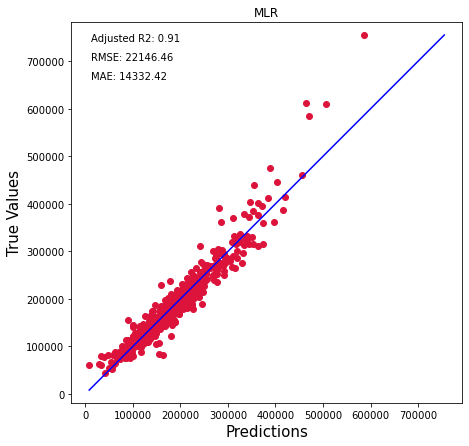

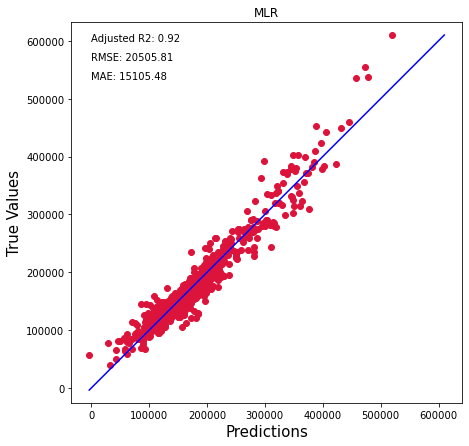

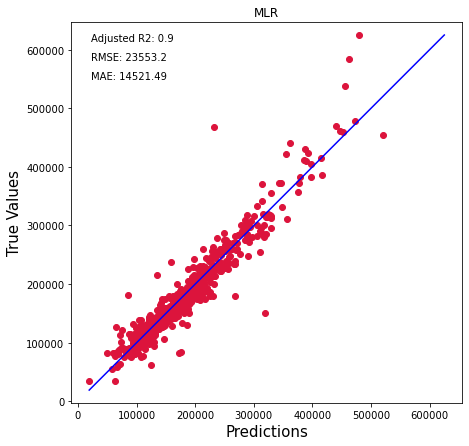

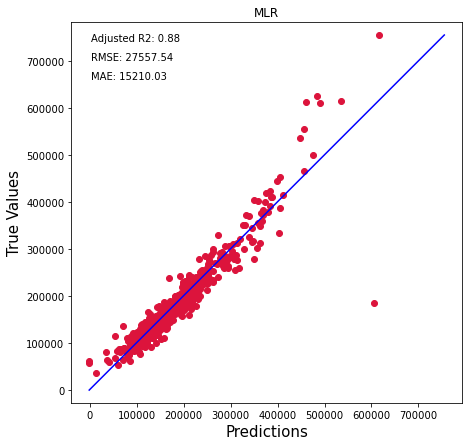

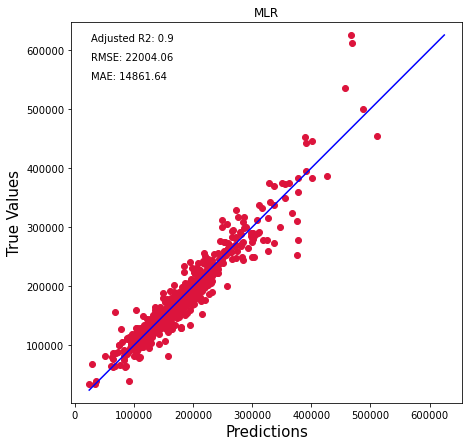

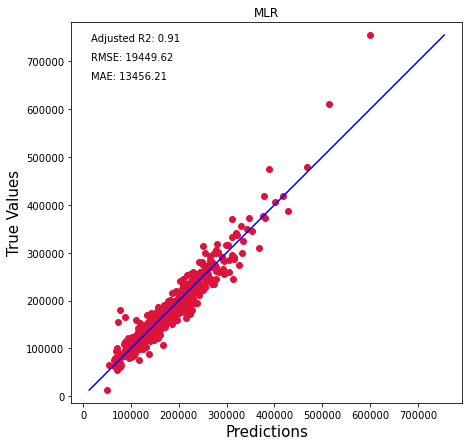

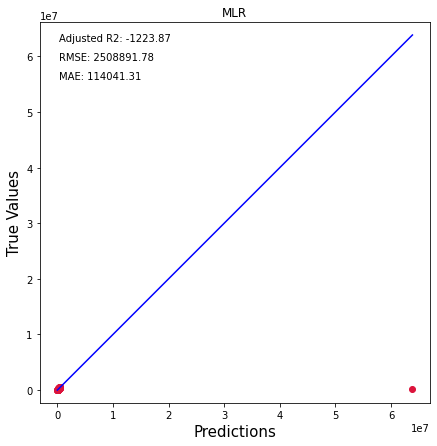

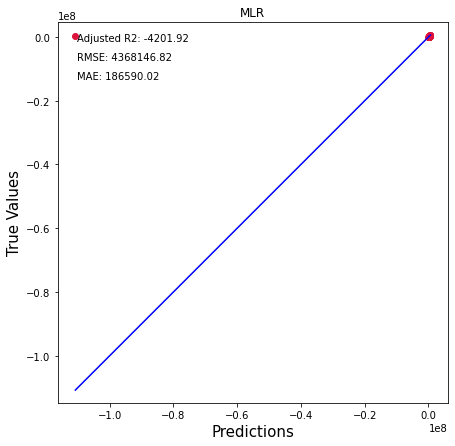

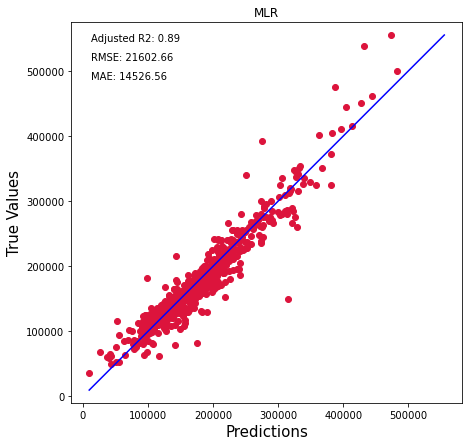

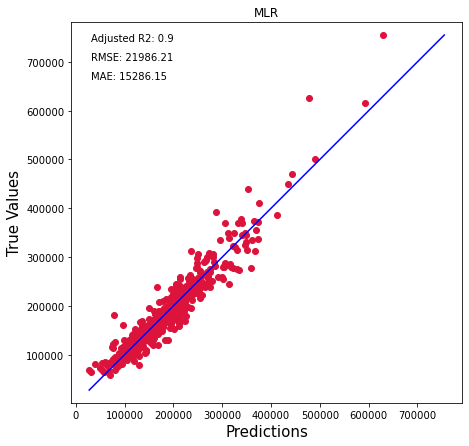

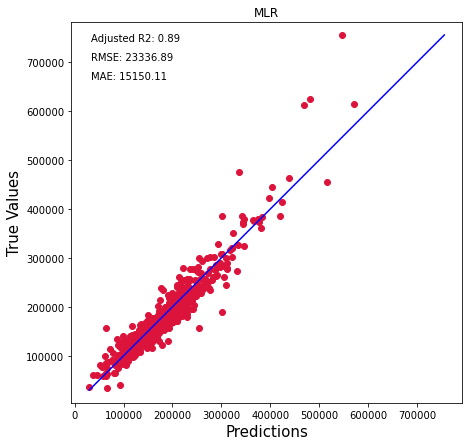

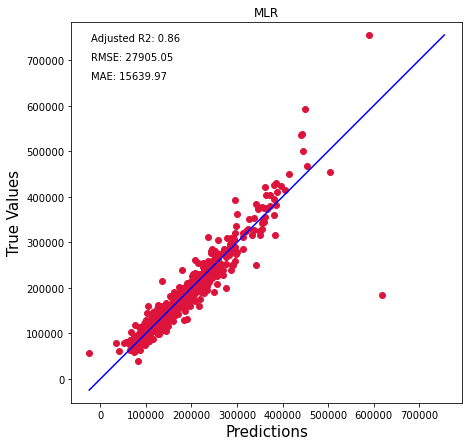

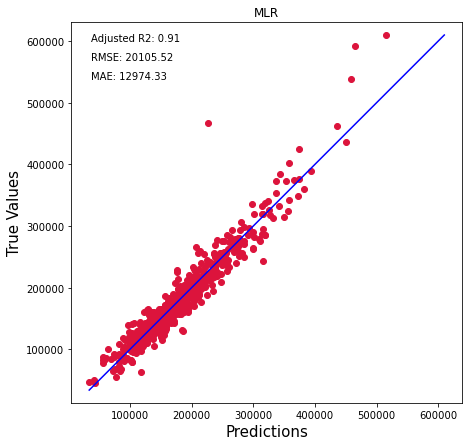

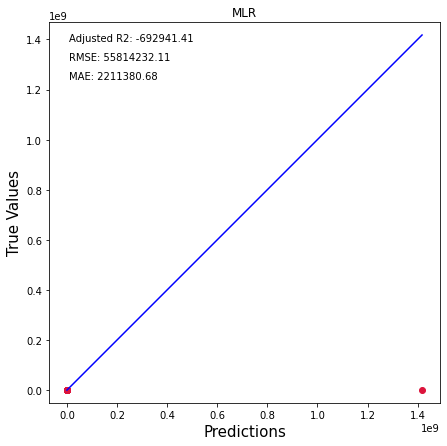

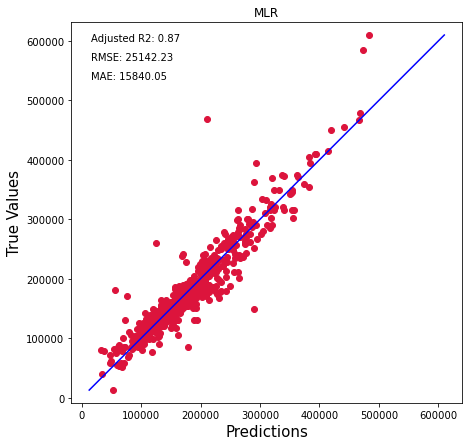

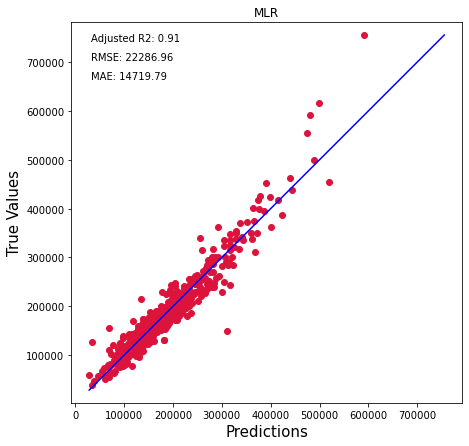

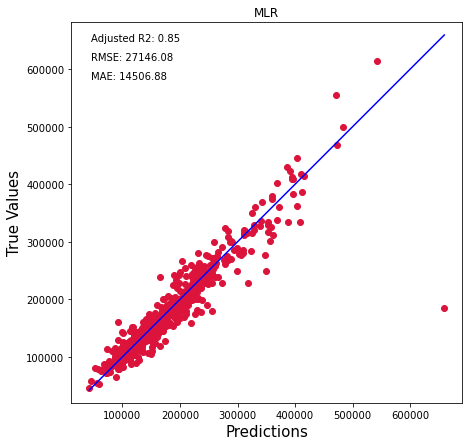

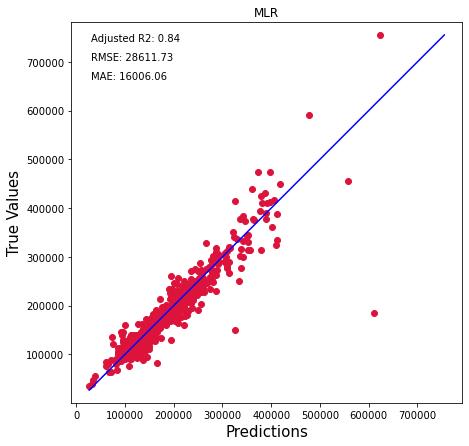

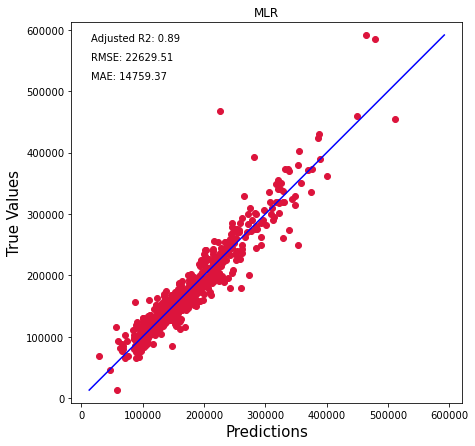

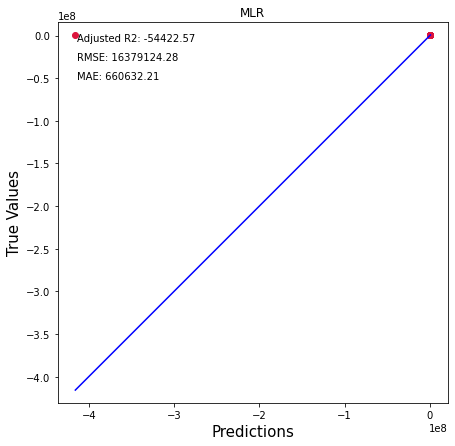

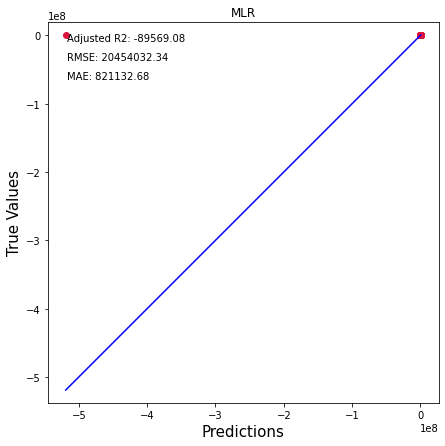

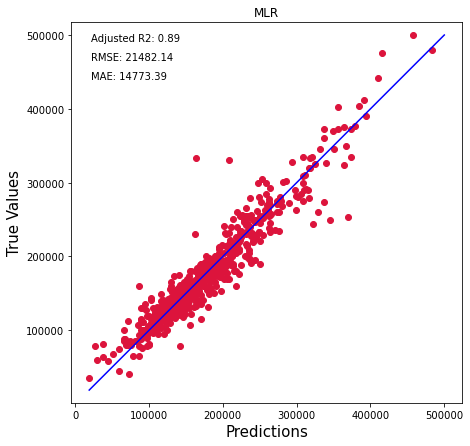

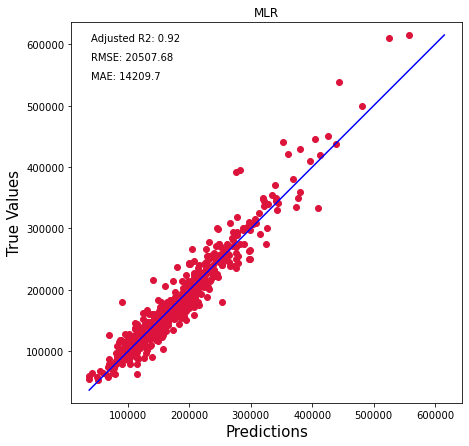

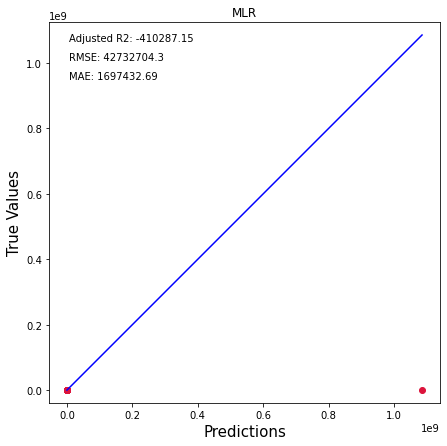

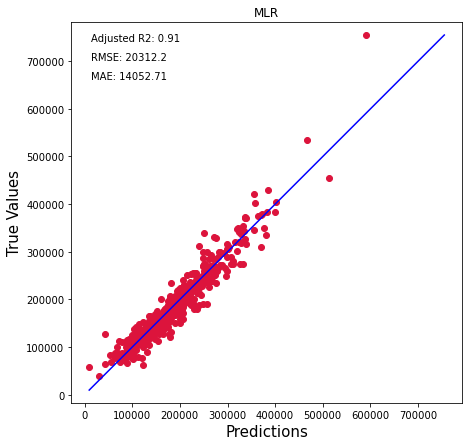

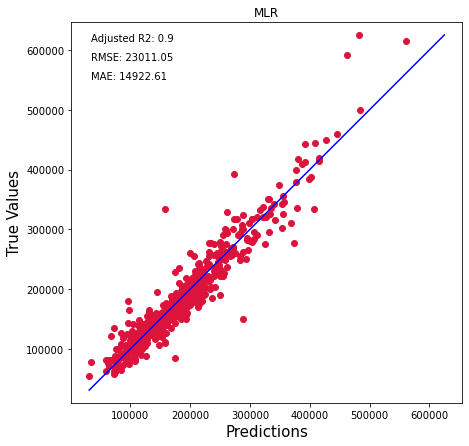

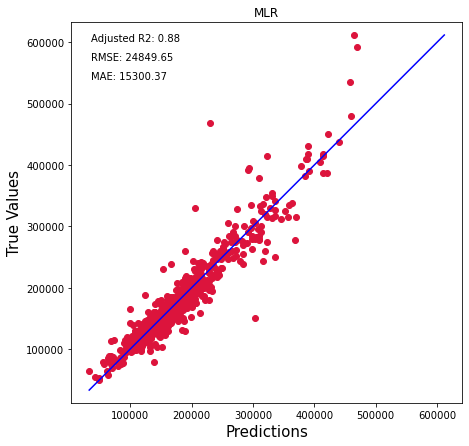

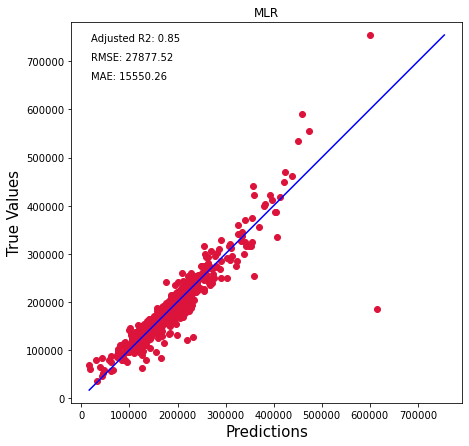

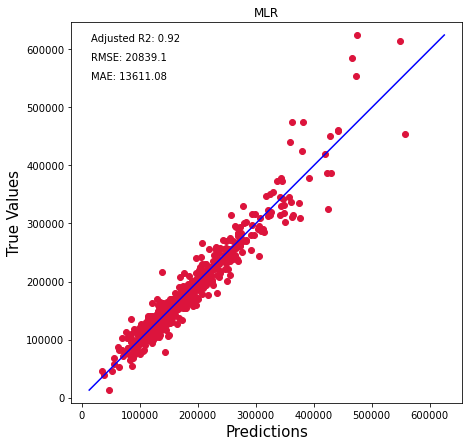

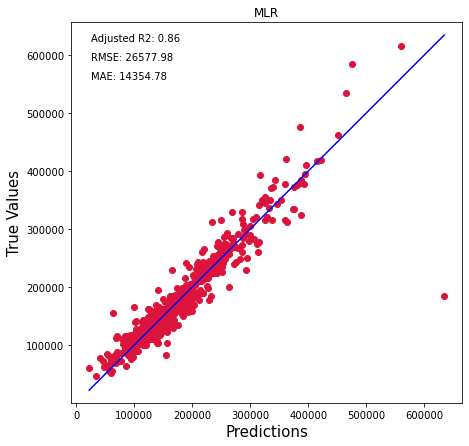

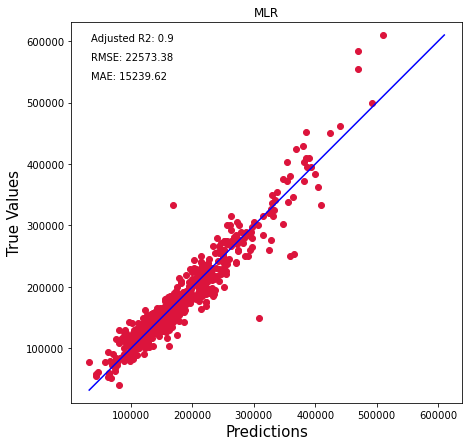

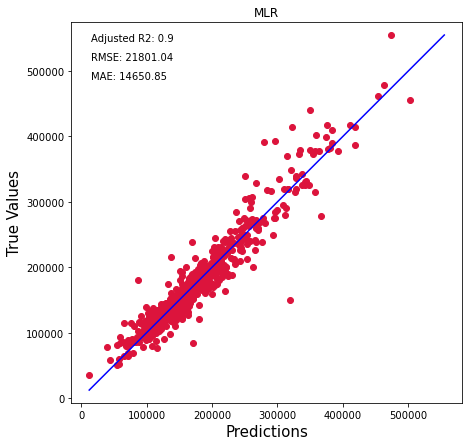

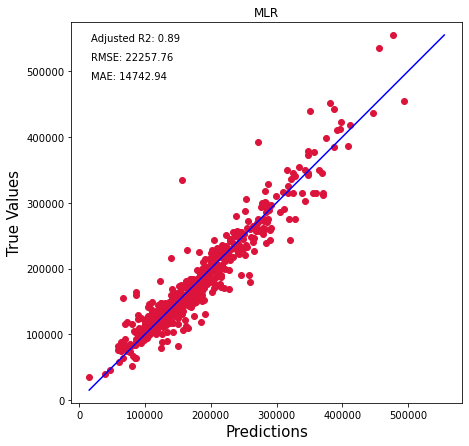

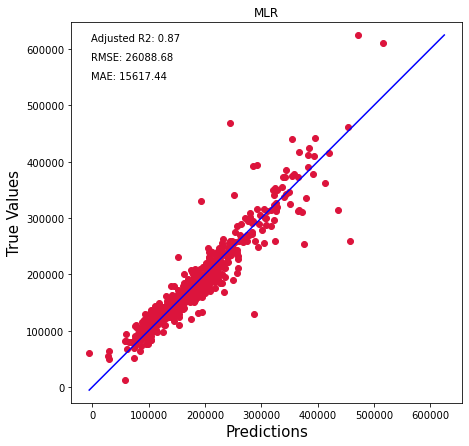

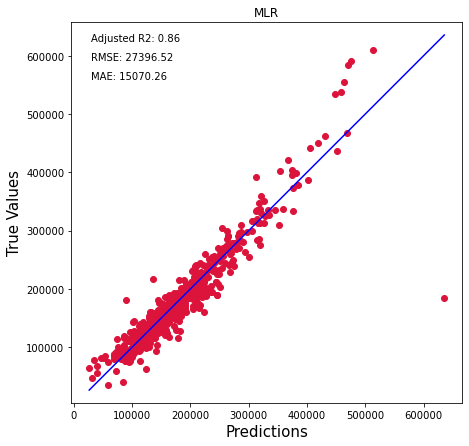

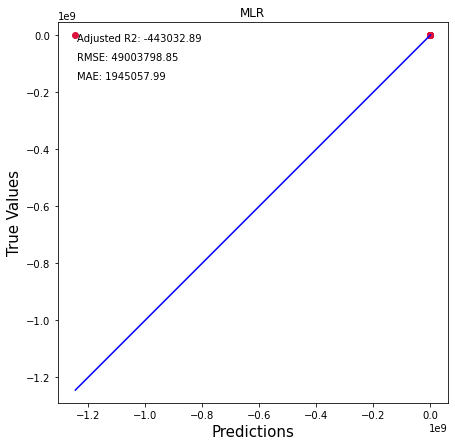

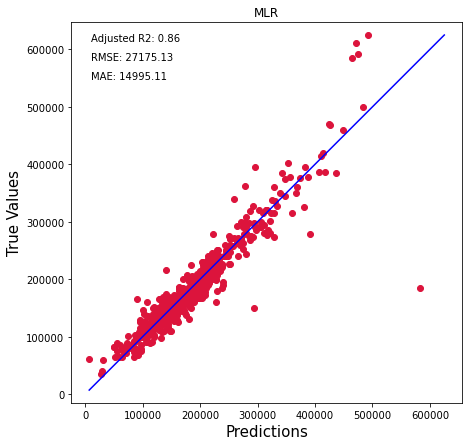

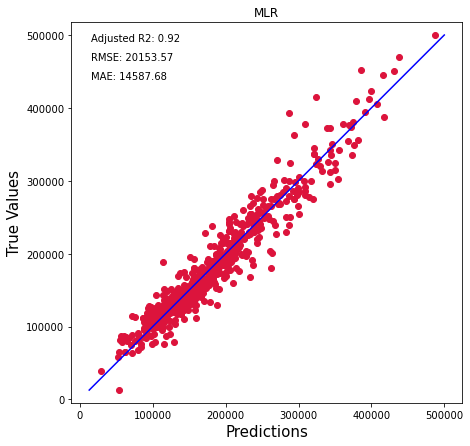

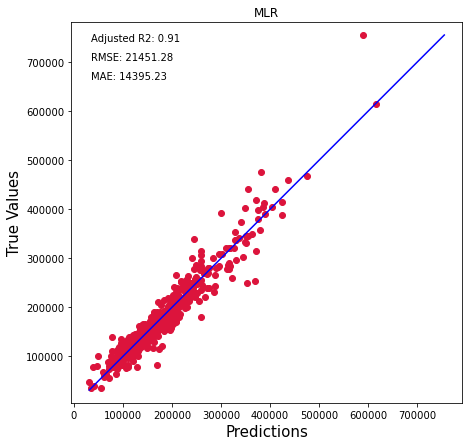

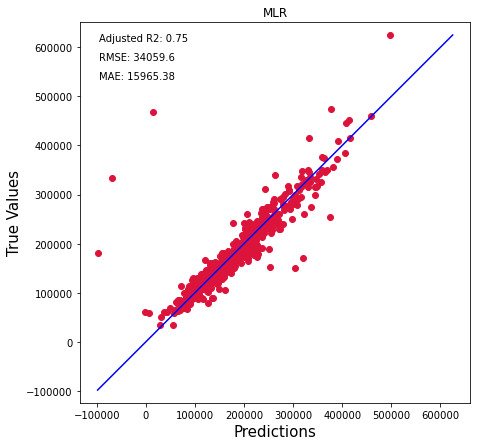

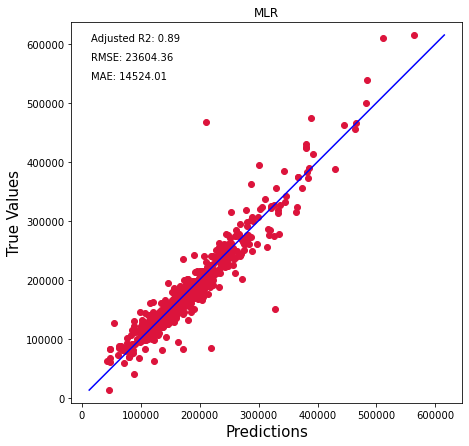

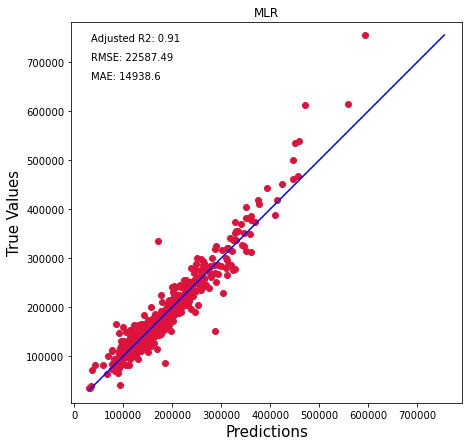

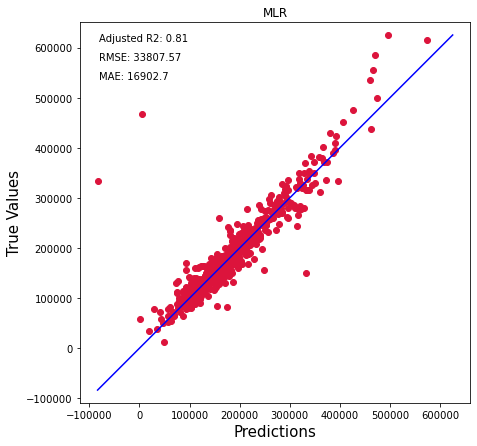

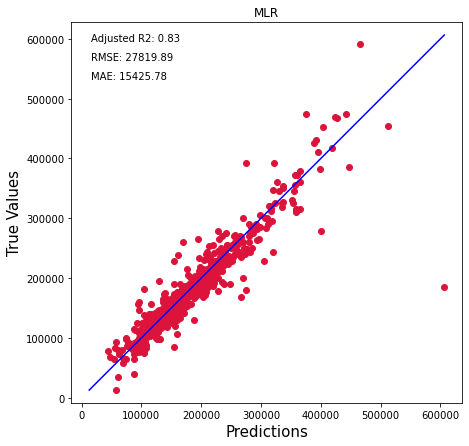

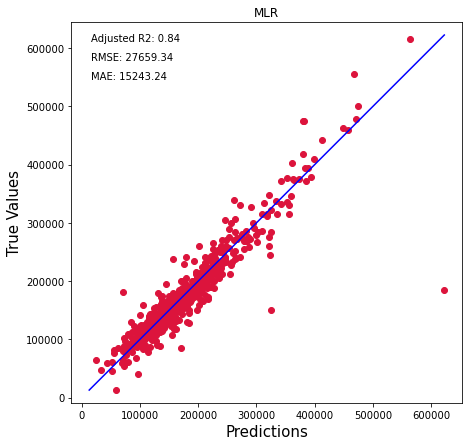

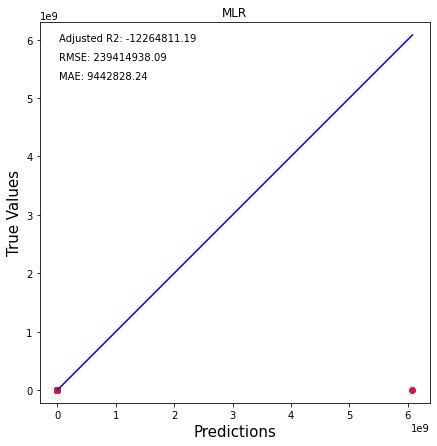

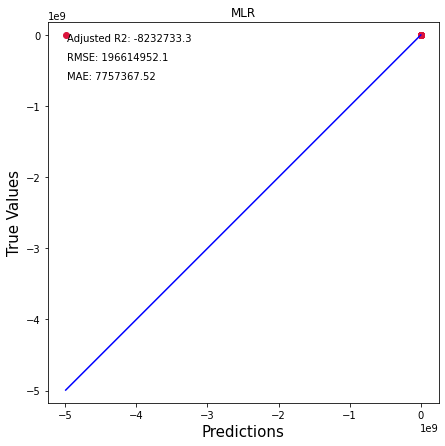

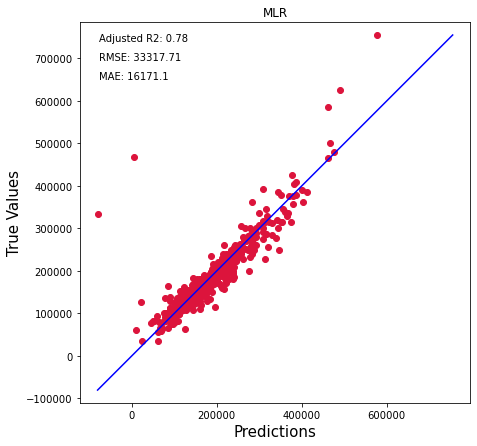

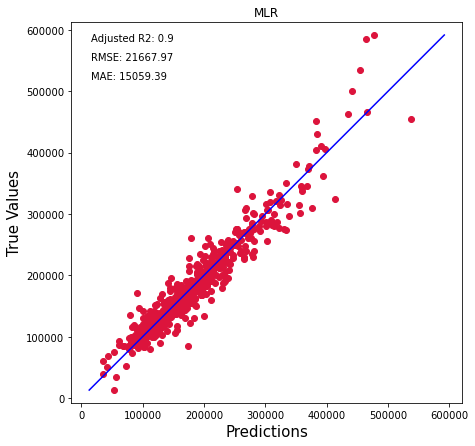

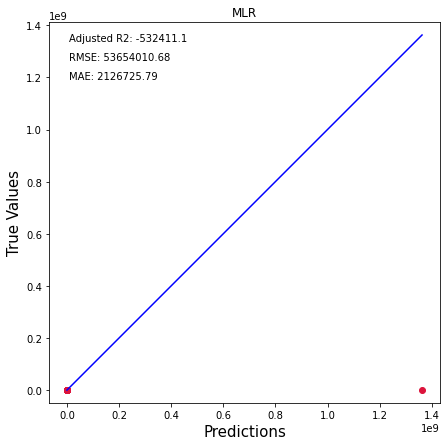

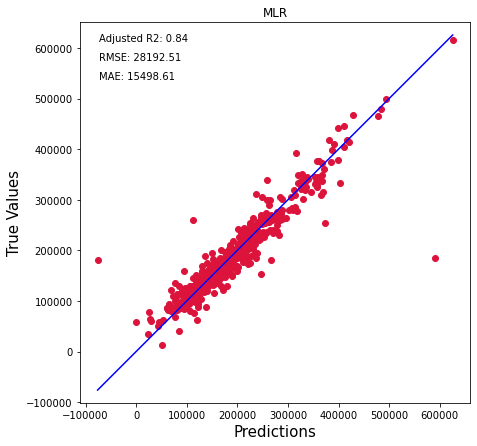

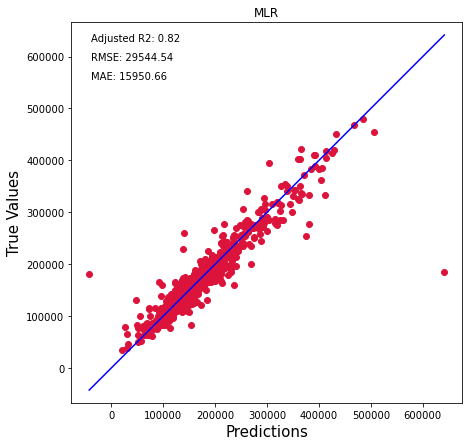

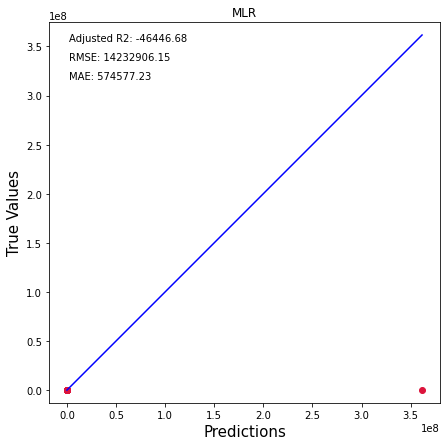

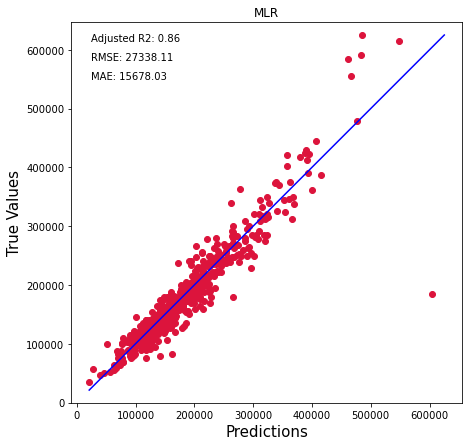

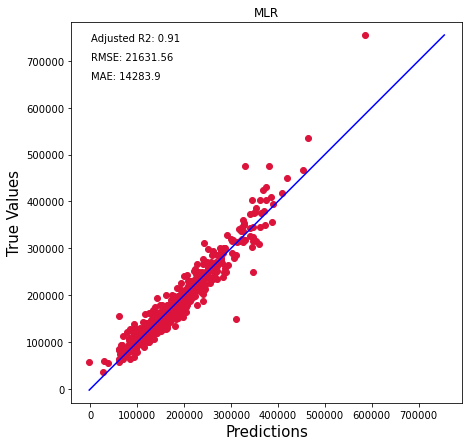

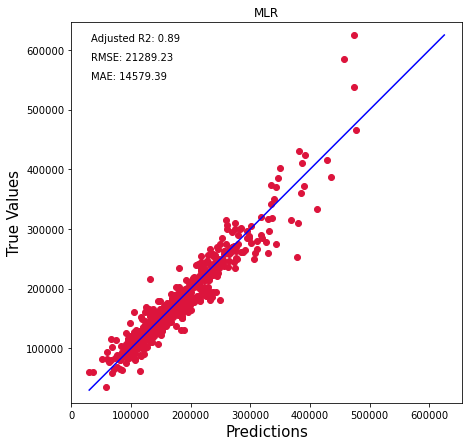

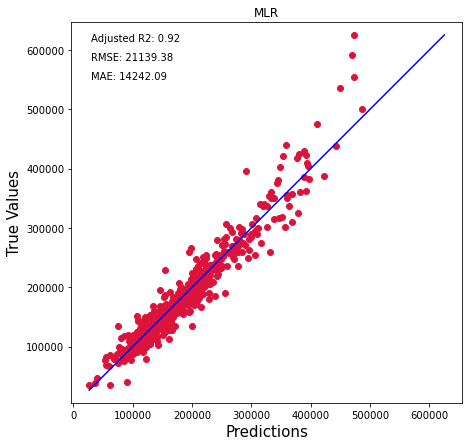

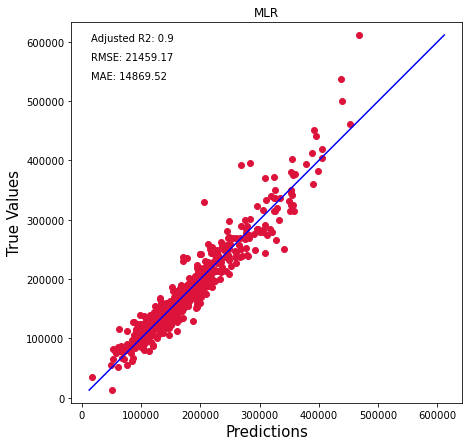

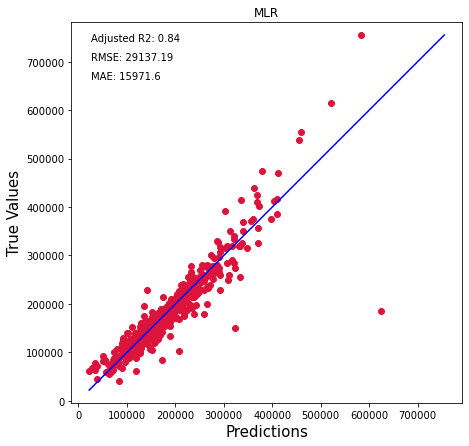

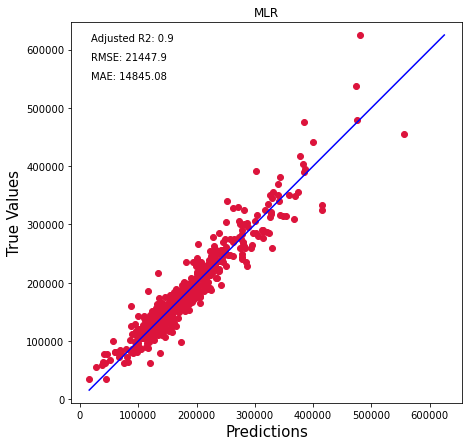

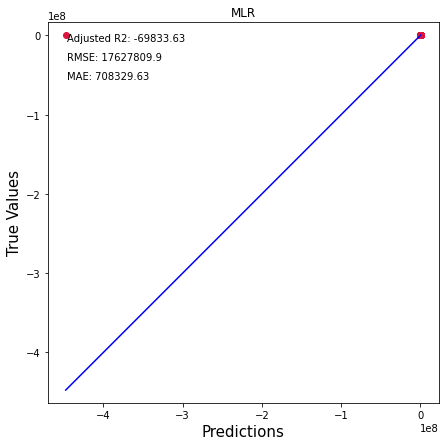

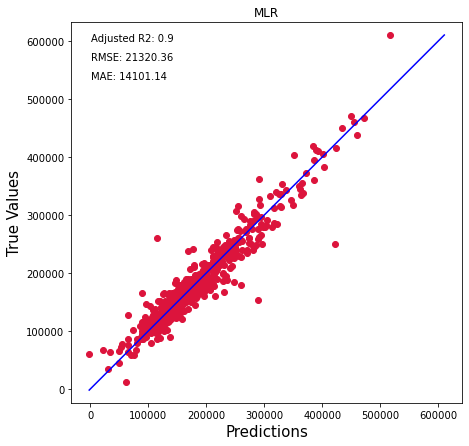

In [9]:
Scores = []
AdjR2 = []
MSE = []
RMSE = []
MAE = []

for i in range(100):
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25)
    MLR.fit(X_train, y_train)
    pred = MLR.predict(X_test)
    Score = r2_score(y_test, pred)
    Scores.append(Score)
    
    Adj_r2 = 1 - (1-r2_score(y_test, pred)) * (len(y)-1)/(len(y)-X.shape[1]-1)
    AdjR2.append(Adj_r2)
    
    mse = mean_squared_error(y_test, pred)
    MSE.append(mse)
    
    rmse = np.sqrt(mse)
    RMSE.append(rmse)
    
    mae = mean_absolute_error(y_test, pred)
    MAE.append(mae)
    
    plt.figure(figsize=(7,7))
    plt.scatter(pred, y_test, c='crimson')

    plt.title('MLR')
    p1 = max(max(pred), max(y_test))
    p2 = min(min(pred), min(y_test))
    plt.plot([p1, p2], [p1, p2], 'b-')
    plt.xlabel('Predictions', fontsize=15)
    plt.ylabel('True Values', fontsize=15)
    plt.axis('equal')
    plt.annotate('Adjusted R2: ' + str(round(Adj_r2,2)), xy=(0.05, 0.95), xycoords='axes fraction')
    plt.annotate('RMSE: ' + str(round(rmse,2)), xy=(0.05, 0.90), xycoords='axes fraction')
    plt.annotate('MAE: ' + str(round(mae,2)), xy=(0.05, 0.85), xycoords='axes fraction')
    plt.show()
    
    
    

In [10]:
combo = pd.DataFrame({'R_Squared': Scores, 'Adjusted_R2': AdjR2, 'Mean Squared Error': MSE,
                      'Root MSE': RMSE, 'Mean Absolute Error': MAE})

In [11]:
combo

,R_Squared,Adjusted_R2,Mean Squared Error,Root MSE,Mean Absolute Error
0,-7.371336e+04,-8.334373e+04,4.041479e+14,2.010343e+07,8.070220e+05
1,9.132053e-01,9.018660e-01,4.609634e+08,2.147006e+04,1.456634e+04
2,8.647291e-01,8.470567e-01,7.368170e+08,2.714437e+04,1.538640e+04
3,8.722967e-01,8.556130e-01,8.273847e+08,2.876430e+04,1.556714e+04
4,8.401174e-01,8.192296e-01,7.226558e+08,2.688226e+04,1.523101e+04
5,9.230344e-01,9.129793e-01,4.266460e+08,2.065541e+04,1.365182e+04
6,8.758749e-01,8.596586e-01,6.058905e+08,2.461484e+04,1.486824e+04
7,-3.519069e+06,-3.978817e+06,2.057333e+16,1.434341e+08,5.662887e+06
8,9.119886e-01,9.004904e-01,4.765538e+08,2.183011e+04,1.441717e+04
9,-3.781117e+06,-4.275099e+06,1.933187e+16,1.390391e+08,5.490201e+06


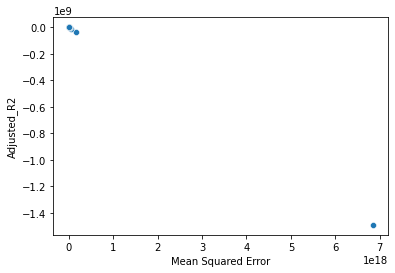

In [12]:
sns.scatterplot(data=combo, x='Mean Squared Error', y='Adjusted_R2'); 

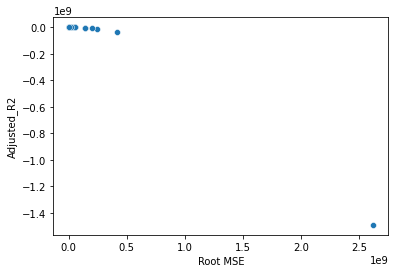

In [13]:
sns.scatterplot(data=combo, x='Root MSE', y='Adjusted_R2'); 

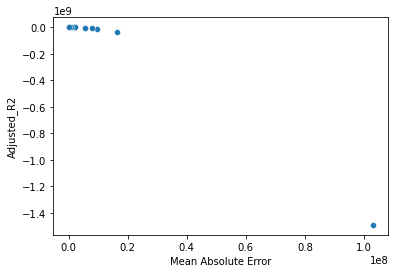

In [14]:
sns.scatterplot(data=combo, x='Mean Absolute Error', y='Adjusted_R2'); 

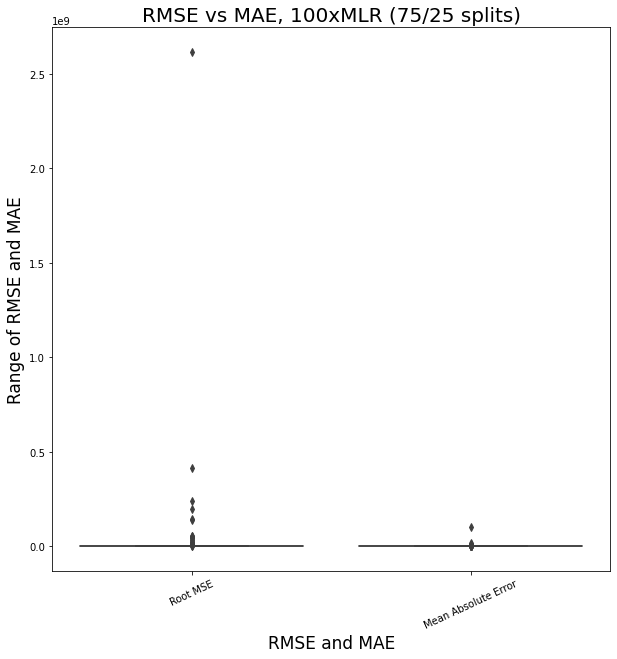

In [15]:
plt.figure(figsize=(10,10))
plt.title('RMSE vs MAE, 100xMLR (75/25 splits)', fontsize=20)
plt.ylabel('Range of RMSE and MAE', fontsize=17)
plt.xlabel('RMSE and MAE', fontsize=17)
sns.boxplot(data=combo[['Root MSE', 'Mean Absolute Error']])
plt.xticks(rotation=25);

In [16]:
NegR2 = combo[combo.R_Squared < 0]
print(len(NegR2))
NegR2

22


,R_Squared,Adjusted_R2,Mean Squared Error,Root MSE,Mean Absolute Error
0,-7.371336e+04,-8.334373e+04,4.041479e+14,2.010343e+07,8.070220e+05
7,-3.519069e+06,-3.978817e+06,2.057333e+16,1.434341e+08,5.662887e+06
9,-3.781117e+06,-4.275099e+06,1.933187e+16,1.390391e+08,5.490201e+06
14,-1.319756e+09,-1.492175e+09,6.848140e+18,2.616895e+09,1.030634e+08
20,-9.615619e+02,-1.087315e+03,5.328049e+12,2.308257e+06,1.060300e+05
21,-3.120627e+04,-3.528333e+04,1.668955e+14,1.291881e+07,5.225260e+05
22,-3.964038e+05,-4.481919e+05,2.109334e+15,4.592749e+07,1.823182e+06
23,-3.538232e+03,-4.000614e+03,1.898323e+13,4.356975e+06,1.864076e+05
24,-2.117799e+05,-2.394479e+05,1.129476e+15,3.360767e+07,1.337798e+06
28,-3.336084e+07,-3.771925e+07,1.732457e+17,4.162280e+08,1.640561e+07


In [28]:
NegR2.describe()

,R_Squared,Adjusted_R2,Mean Squared Error,Root MSE,Mean Absolute Error
count,2.200000e+01,2.200000e+01,2.200000e+01,2.200000e+01,2.200000e+01
mean,-6.278807e+07,-7.099098e+07,3.260249e+17,1.885284e+08,7.438689e+06
std,2.808437e+08,3.175344e+08,1.457235e+18,5.516470e+08,2.172289e+07
min,-1.319756e+09,-1.492175e+09,5.328049e+12,2.308257e+06,1.060300e+05
25%,-2.792520e+06,-3.157348e+06,2.190006e+14,1.476946e+07,5.960910e+05
50%,-2.873294e+05,-3.248675e+05,1.477780e+15,3.817019e+07,1.517615e+06
75%,-4.284329e+04,-4.844066e+04,1.527771e+16,1.182329e+08,4.670496e+06
max,-9.615619e+02,-1.087315e+03,6.848140e+18,2.616895e+09,1.030634e+08


In [17]:
PosR2 = combo[combo.R_Squared > 0]
print(len(PosR2))
PosR2.head(10)

78


,R_Squared,Adjusted_R2,Mean Squared Error,Root MSE,Mean Absolute Error
1,0.913205,0.901866,4.609634e+08,21470.058619,14566.336549
2,0.864729,0.847057,7.368170e+08,27144.373148,15386.397379
3,0.872297,0.855613,8.273847e+08,28764.295726,15567.144063
4,0.840117,0.819230,7.226558e+08,26882.257889,15231.013721
5,0.923034,0.912979,4.266460e+08,20655.409719,13651.817796
6,0.875875,0.859659,6.058905e+08,24614.842484,14868.242055
8,0.911989,0.900490,4.765538e+08,21830.112323,14417.167304
10,0.922870,0.912793,4.557675e+08,21348.712604,15121.200286
11,0.860240,0.841981,7.392566e+08,27189.274358,15174.650346
12,0.924435,0.914563,4.554653e+08,21341.633552,14926.800769


In [29]:
PosR2.to_csv('MLR.csv', index=False)

In [27]:
PosR2.describe()

,R_Squared,Adjusted_R2,Mean Squared Error,Root MSE,Mean Absolute Error
count,78.000000,78.000000,7.800000e+01,78.000000,78.000000
mean,0.894954,0.881230,5.896353e+08,24009.328098,14932.419248
std,0.033043,0.037360,1.885343e+08,3654.962390,741.339912
min,0.782261,0.753814,3.430668e+08,18522.062189,12974.329319
25%,0.876381,0.860231,4.602422e+08,21453.255343,14522.119359
50%,0.908472,0.896515,5.098761e+08,22580.435727,14896.064510
75%,0.919632,0.909133,7.380932e+08,27167.868228,15296.811385
max,0.933161,0.924429,1.160056e+09,34059.595811,17105.684657


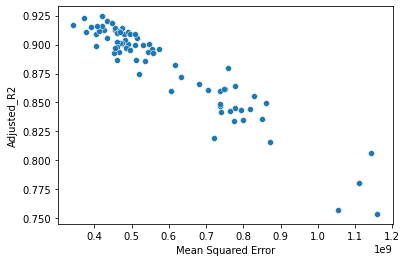

In [18]:
sns.scatterplot(data=PosR2, x='Mean Squared Error', y='Adjusted_R2'); 

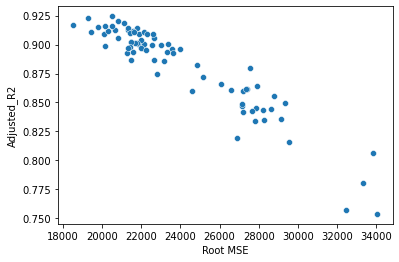

In [19]:
sns.scatterplot(data=PosR2, x='Root MSE', y='Adjusted_R2'); 

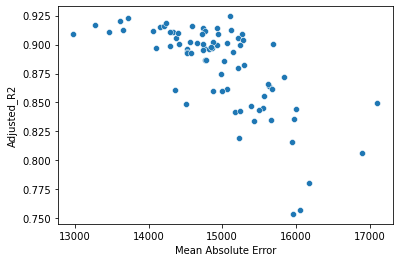

In [20]:
sns.scatterplot(data=PosR2, x='Mean Absolute Error', y='Adjusted_R2'); 

In [21]:
boxdata = PosR2[['R_Squared', 'Adjusted_R2']]

In [22]:
boxdata.shape

(78, 2)

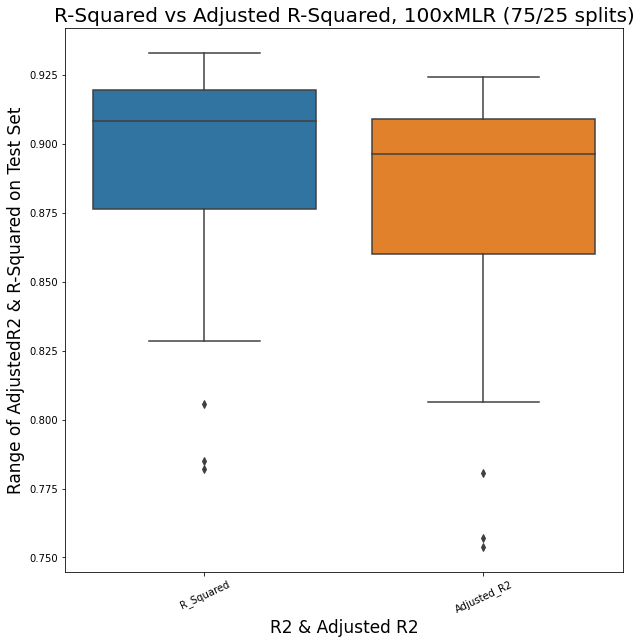

In [23]:
plt.figure(figsize=(10,10))
plt.title('R-Squared vs Adjusted R-Squared, 100xMLR (75/25 splits)', fontsize=20)
plt.ylabel('Range of AdjustedR2 & R-Squared on Test Set', fontsize=17)
plt.xlabel('R2 & Adjusted R2', fontsize=17)
sns.boxplot(data=boxdata)
plt.xticks(rotation=25);

In [26]:
boxdata.describe()

,R_Squared,Adjusted_R2
count,78.000000,78.000000
mean,0.894954,0.881230
std,0.033043,0.037360
min,0.782261,0.753814
25%,0.876381,0.860231
50%,0.908472,0.896515
75%,0.919632,0.909133
max,0.933161,0.924429


In [24]:
boxdata2 = PosR2[['Root MSE', 'Mean Absolute Error']]

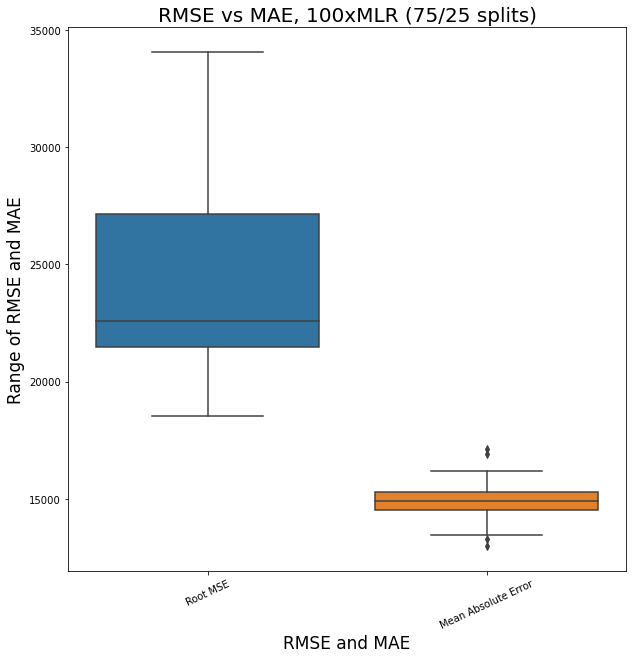

In [25]:
plt.figure(figsize=(10,10))
plt.title('RMSE vs MAE, 100xMLR (75/25 splits)', fontsize=20)
plt.ylabel('Range of RMSE and MAE', fontsize=17)
plt.xlabel('RMSE and MAE', fontsize=17)
sns.boxplot(data=boxdata2)
plt.xticks(rotation=25);

In [25]:
boxdata2.describe()

,Root MSE,Mean Absolute Error
count,86.000000,86.000000
mean,23947.639981,14834.133047
std,3426.303646,664.066323
min,18923.654372,13461.193826
25%,21455.207685,14353.203607
50%,22876.439277,14766.069539
75%,26401.031811,15313.148896
max,33007.457493,16281.500836
